### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



/tmp/ipython-input-2044714994.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])


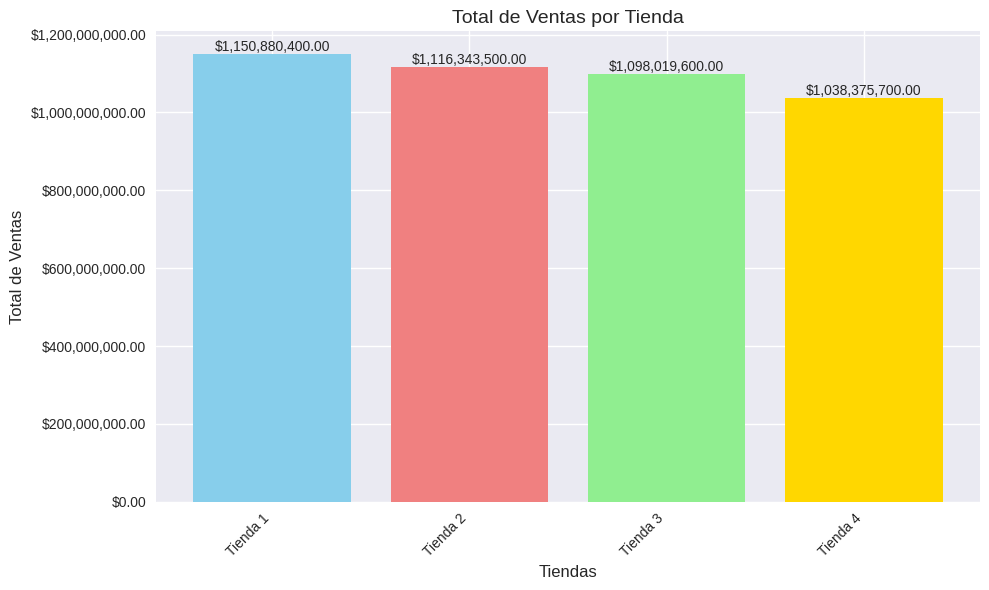

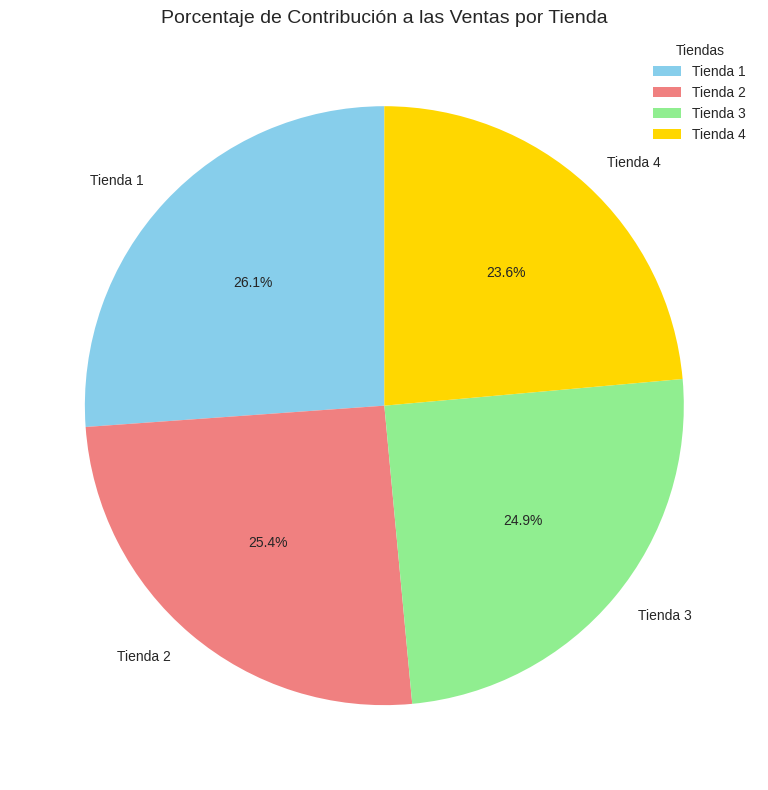

In [ ]:
#Tuve que importar la librería de nuevo por fallas del codigo.

import matplotlib.pyplot as plt
# Facturación por tienda
total_sales_tienda1 = tienda['Precio'].sum()
total_sales_tienda2 = tienda2['Precio'].sum()
total_sales_tienda3 = tienda3['Precio'].sum()
total_sales_tienda4 = tienda4['Precio'].sum()

# Listado de totales
total_sales = [total_sales_tienda1, total_sales_tienda2, total_sales_tienda3, total_sales_tienda4]
stores = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Facturación total del Negocio
total_revenue = sum(total_sales)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(stores, total_sales, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylabel('Total de Ventas', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.title('Total de Ventas por Tienda', fontsize=14)
plt.xticks(rotation=45, ha='right')


# Format the y-axis as currency
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, '${:,.2f}'.format(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=stores, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Porcentaje de Contribución a las Ventas por Tienda', fontsize=14)

# Add data labels
plt.legend(title="Tiendas")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Análisis de facturación por ciudad y costos de envío
def analizar_facturacion_envios(tienda, nombre_tienda):
    # Agrupar por ciudad y calcular la facturación total
    facturacion_ciudad = tienda.groupby('Lugar de Compra')['Precio'].sum()

    # Calcular el costo total de envíos por ciudad
    costo_envio_ciudad = tienda.groupby('Lugar de Compra')['Costo de envío'].sum()

    # Crear un DataFrame con la información
    analisis_df = pd.DataFrame({
        'Facturación': facturacion_ciudad,
        'Costo de Envío': costo_envio_ciudad
    })

    # Calcular la diferencia entre facturación y costo de envío
    analisis_df['Diferencia'] = analisis_df['Facturación'] - analisis_df['Costo de Envío']

    # Agregar el nombre de la tienda como columna
    analisis_df['Tienda'] = nombre_tienda

    return analisis_df

# Aplicar la función a cada tienda
analisis_tienda1 = analizar_facturacion_envios(tienda, 'Tienda 1')
analisis_tienda2 = analizar_facturacion_envios(tienda2, 'Tienda 2')
analisis_tienda3 = analizar_facturacion_envios(tienda3, 'Tienda 3')
analisis_tienda4 = analizar_facturacion_envios(tienda4, 'Tienda 4')

# Concatenar los resultados en un solo DataFrame
analisis_total = pd.concat([analisis_tienda1, analisis_tienda2, analisis_tienda3, analisis_tienda4])

# Mostrar el DataFrame resultante
analisis_total

,Facturación,Costo de Envío,Diferencia,Tienda
Lugar de Compra,,,,
Armenia,4615700.0,242400.0,4373300.0,Tienda 1
Barranquilla,32907700.0,1778100.0,31129600.0,Tienda 1
Bogotá,440005000.0,23434800.0,416570200.0,Tienda 1
Bucaramanga,17579200.0,948200.0,16631000.0,Tienda 1
Cali,154493700.0,8158200.0,146335500.0,Tienda 1
...,...,...,...,...
Riohacha,23684700.0,1274800.0,22409900.0,Tienda 4
Santa Marta,13218600.0,701600.0,12517000.0,Tienda 4
Soacha,3149000.0,179000.0,2970000.0,Tienda 4


/tmp/ipython-input-3308493438.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])


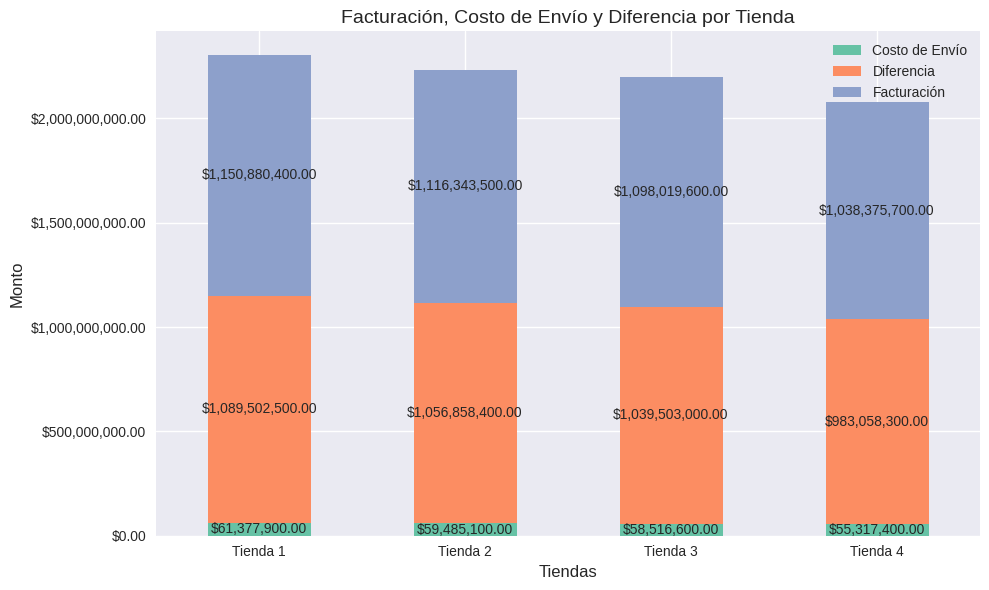

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras apiladas
analisis_total.pivot_table(index='Tienda',
                           values=['Facturación', 'Costo de Envío', 'Diferencia'],
                           aggfunc='sum').plot(kind='bar', stacked=True, figsize=(10, 6))

plt.ylabel('Monto', fontsize=12)  # Etiqueta del eje Y
plt.xlabel('Tiendas', fontsize=12)  # Etiqueta del eje X
plt.title('Facturación, Costo de Envío y Diferencia por Tienda', fontsize=14)
plt.xticks(rotation=0) # Rotación de las etiquetas del eje X

# Formatear el eje Y como moneda
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])

# Agregar etiquetas de datos
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height/2, '${:,.2f}'.format(height), ha='center', va='center')

plt.tight_layout()
plt.show()


/tmp/ipython-input-2760675957.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])


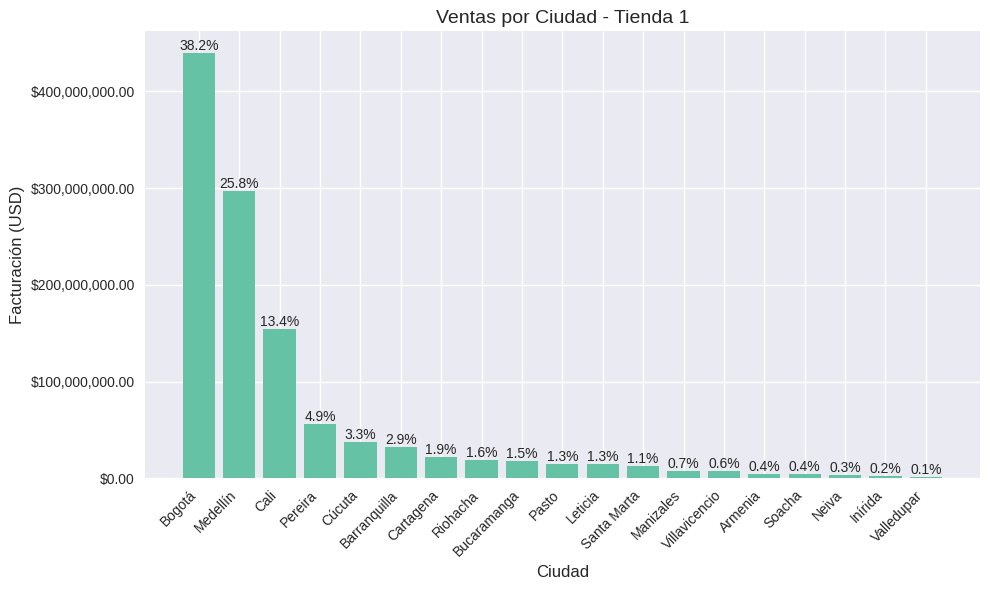

/tmp/ipython-input-2760675957.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])


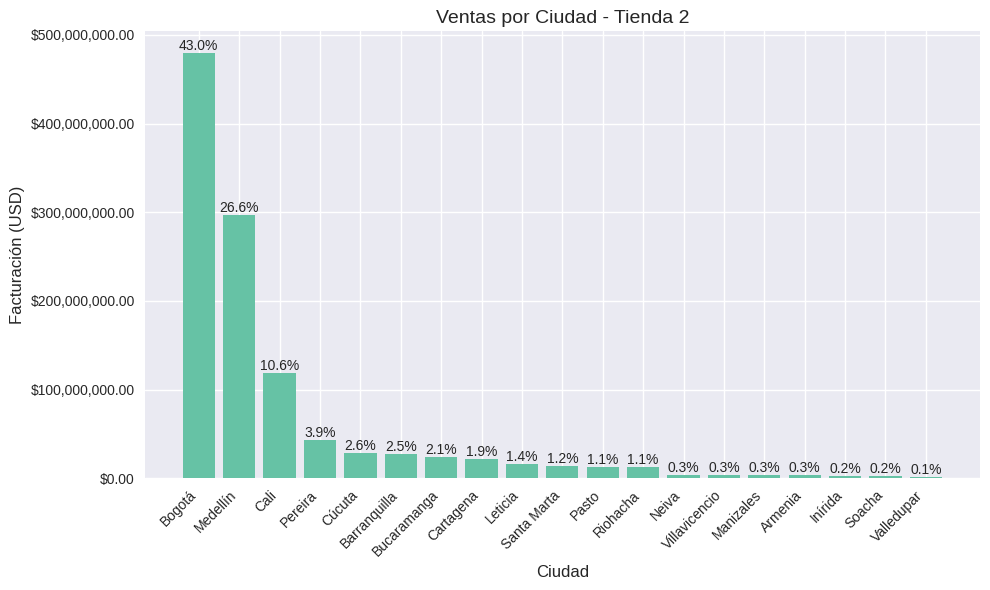

/tmp/ipython-input-2760675957.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])


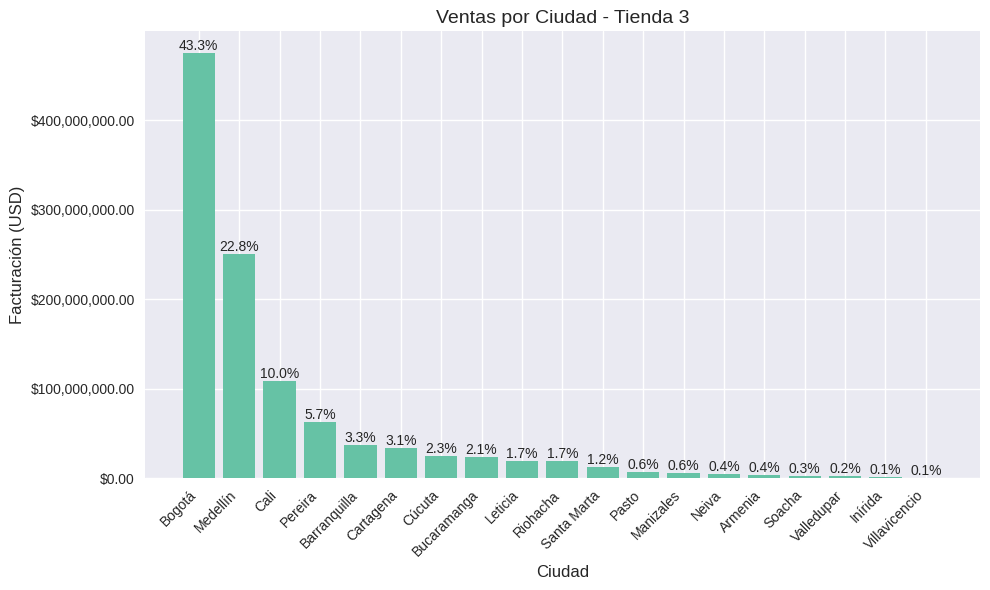

/tmp/ipython-input-2760675957.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])


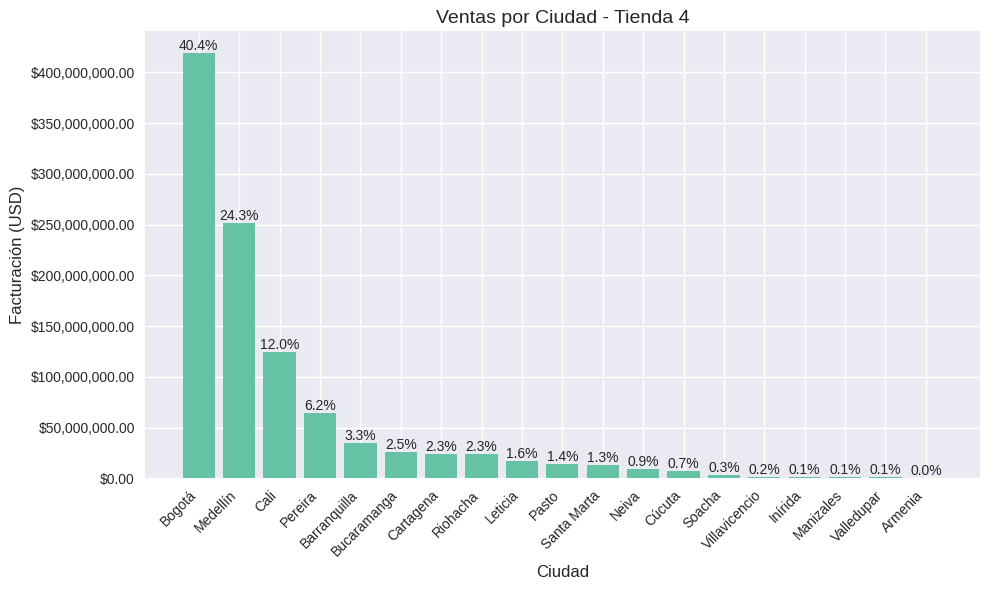

In [ ]:
import matplotlib.pyplot as plt

def plot_sales_by_city(analisis_total):
    # Agrupar por tienda y lugar de compra, sumando la facturación
    sales_by_city = analisis_total.groupby(['Tienda', 'Lugar de Compra'])['Facturación'].sum().reset_index()

    # Ordenar por tienda y facturación para visualizar mejor en el gráfico
    sales_by_city = sales_by_city.sort_values(['Tienda', 'Facturación'], ascending=[True, False])

    for store in sales_by_city['Tienda'].unique():
        store_data = sales_by_city[sales_by_city['Tienda'] == store]

        # Calcular porcentajes para las etiquetas de datos
        total_sales_store = store_data['Facturación'].sum()
        percentages = (store_data['Facturación'] / total_sales_store) * 100

        plt.figure(figsize=(10, 6))
        bars = plt.bar(store_data['Lugar de Compra'], store_data['Facturación'])
        plt.title(f'Ventas por Ciudad - {store}', fontsize=14)
        plt.xlabel('Ciudad', fontsize=12)
        plt.ylabel('Facturación (USD)', fontsize=12)
        plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x

        # Formatear el eje Y como moneda
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])

        # Agregar etiquetas de datos con porcentajes, evitando superposiciones
        for i, bar in enumerate(bars):
            yval = bar.get_height()
            label = f'{percentages.iloc[i]:.1f}%'  # Mostrar porcentaje con un decimal
            plt.text(bar.get_x() + bar.get_width() / 2, yval, label, ha='center', va='bottom')


        plt.tight_layout()
        plt.show()

plot_sales_by_city(analisis_total)


# 2. Ventas por categoría

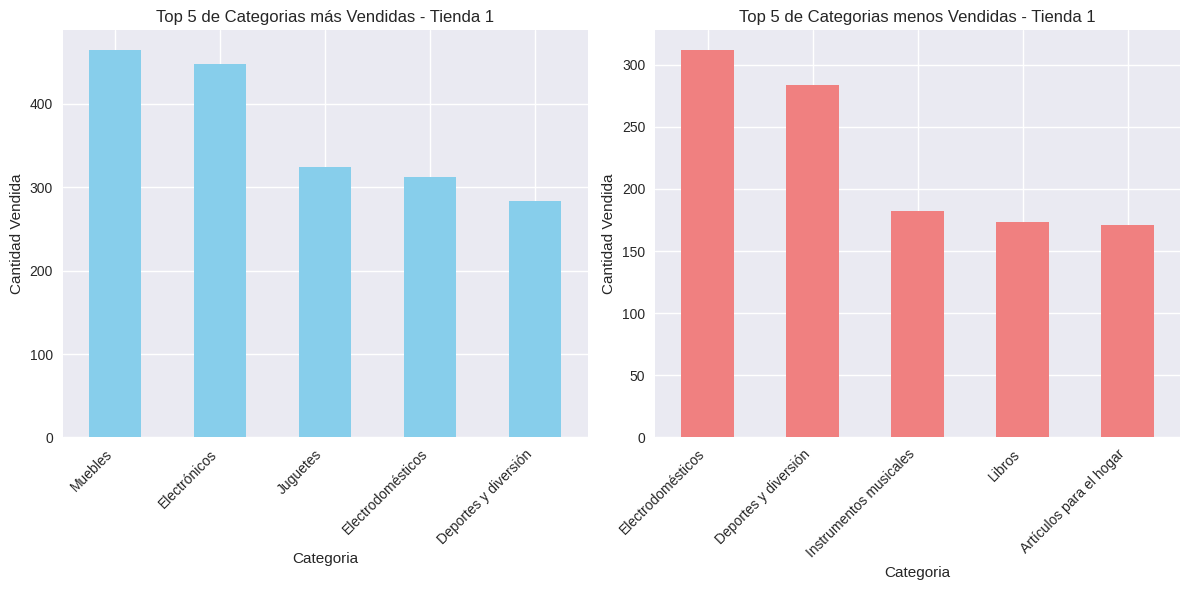

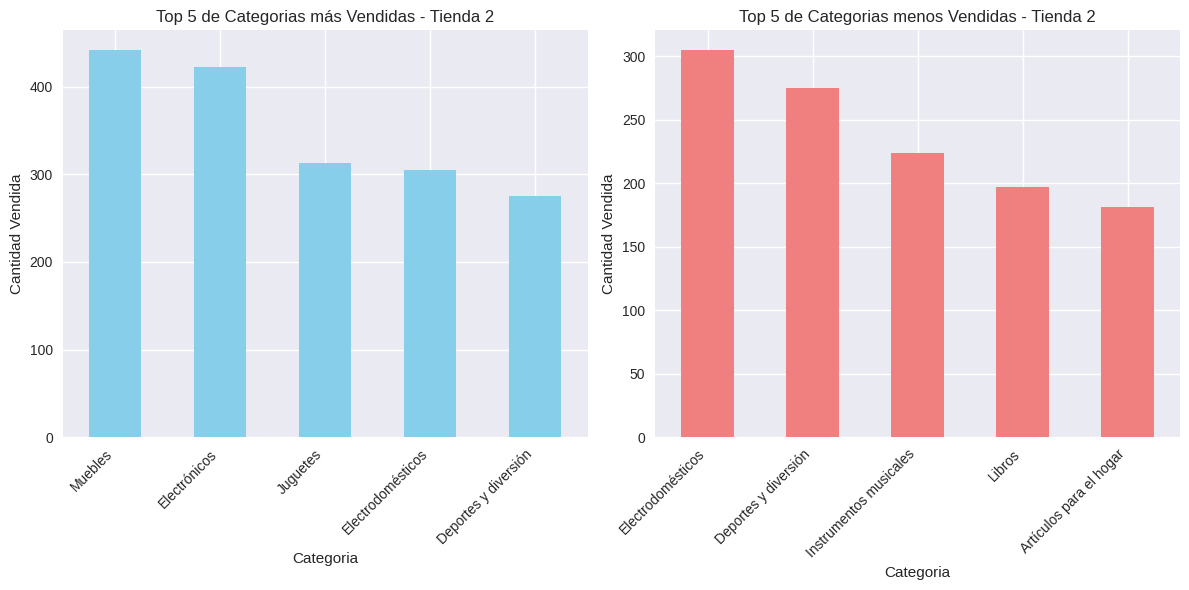

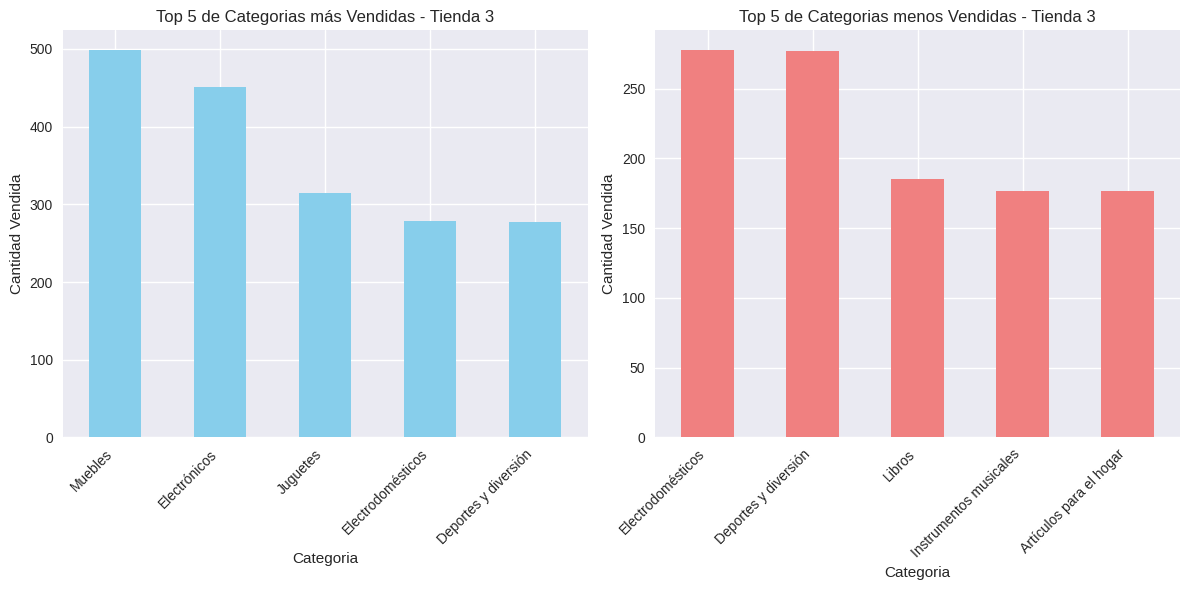

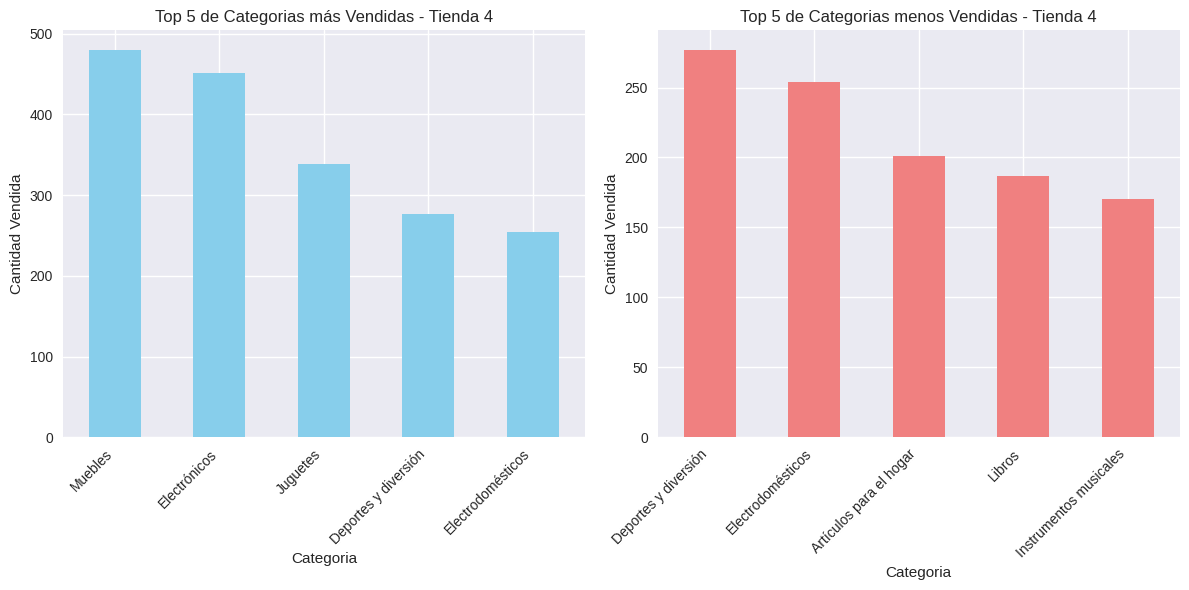

In [ ]:
import matplotlib.pyplot as plt
def analyze_product_sales(store_data, store_name):
    "Análisis y visualización de ventas por producto (tienda)"

    # Conteo de productos por categoria
    category_sales = store_data['Categoría del Producto'].value_counts()

    # Identificación de las más y menos categorias vendidas
    top_sellers = category_sales.head(5)
    bottom_sellers = category_sales.tail(5)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    top_sellers.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 de Categorias más Vendidas - {store_name}')
    plt.xlabel('Categoria')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    bottom_sellers.plot(kind='bar', color='lightcoral')
    plt.title(f'Top 5 de Categorias menos Vendidas - {store_name}')
    plt.xlabel('Categoria')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Analisis de las categorias por tienda
analyze_product_sales(tienda, 'Tienda 1')
analyze_product_sales(tienda2, 'Tienda 2')
analyze_product_sales(tienda3, 'Tienda 3')
analyze_product_sales(tienda4, 'Tienda 4')

# 3. Calificación promedio de la tienda


/tmp/ipython-input-198806166.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])


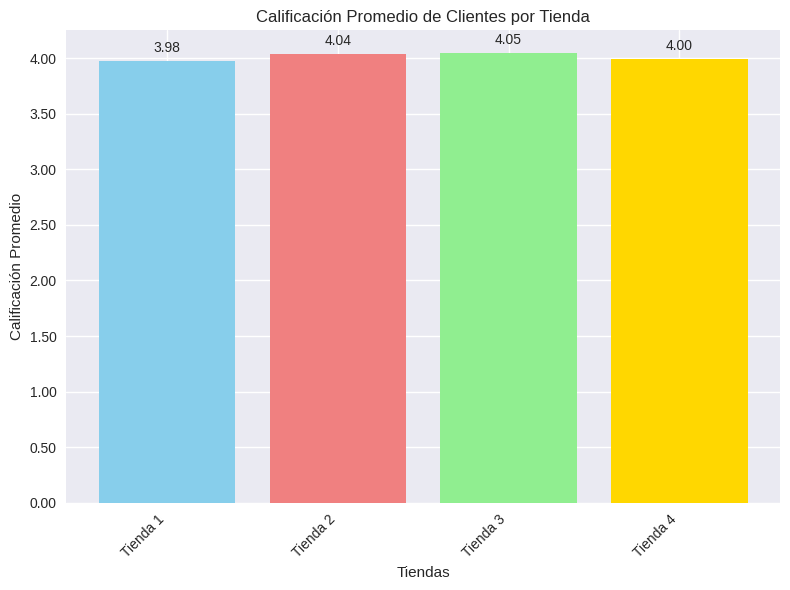

La calificación promedio de Tienda 1 es: 3.98
La calificación promedio de Tienda 2 es: 4.04
La calificación promedio de Tienda 3 es: 4.05
La calificación promedio de Tienda 4 es: 4.00


In [ ]:
import matplotlib.pyplot as plt
# Calcular las calificaciones promedio de los clientes para cada tienda
average_ratings = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

# Crear el gráfico de barras para mostrar las calificaciones promedio
plt.figure(figsize=(8, 6))
plt.bar(average_ratings.keys(), average_ratings.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio de Clientes por Tienda')

# Formatear las etiquetas del eje y para mostrar dos decimales
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])

# Agregar las etiquetas de datos a cada barra
for i, v in enumerate(average_ratings.values()):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')  # Ajusta 0.05 para evitar superposiciones

plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()
plt.show()

# Imprimir las calificaciones promedio para cada tienda (opcional)
for tienda, calificacion in average_ratings.items():
    print(f"La calificación promedio de {tienda} es: {calificacion:.2f}")

                     Producto  Calificación    Tienda
0           Ajedrez de madera          4.43  Tienda 1
1                     Armario          3.95  Tienda 1
2           Asistente virtual          4.08  Tienda 1
3                 Auriculares          3.64  Tienda 1
4   Auriculares con micrófono          3.97  Tienda 1
..                        ...           ...       ...
46                 Smartwatch          3.97  Tienda 4
47            Sofá reclinable          3.87  Tienda 4
48              TV LED UHD 4K          3.58  Tienda 4
49                Tablet ABXY          4.02  Tienda 4
50               Vaso térmico          4.15  Tienda 4

[204 rows x 3 columns]


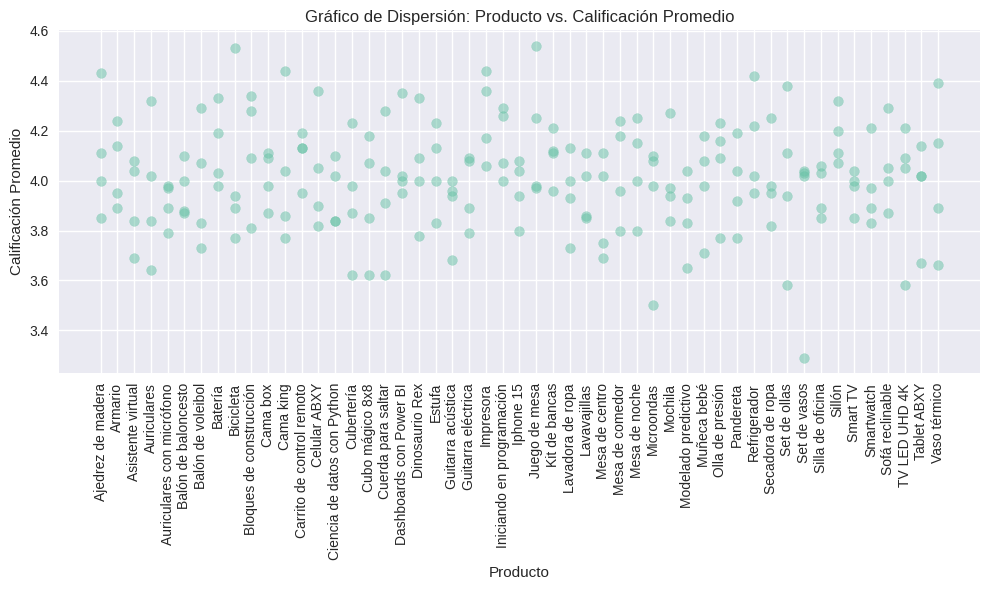

/tmp/ipython-input-3440165588.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([calificacion_total[calificacion_total['Tienda'] == tienda]['Calificación'] for tienda in calificacion_total['Tienda'].unique()],


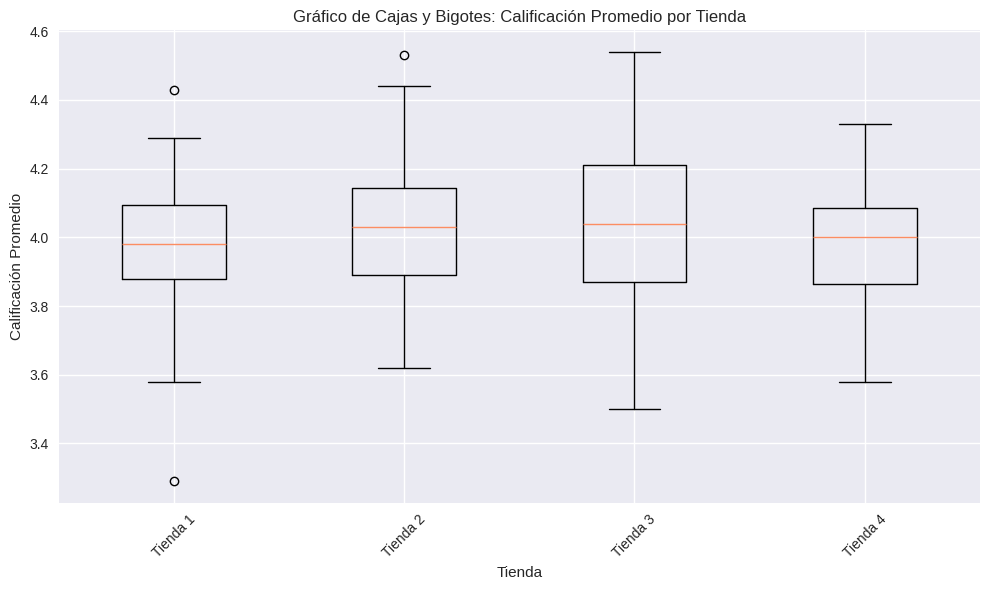

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calcular la calificación promedio de cada producto en cada tienda con dos cifras significativas
def calificacion_promedio_producto(tienda, nombre_tienda):
    """
    Calcula la calificación promedio de cada producto en una tienda dada.

    Args:
      tienda: DataFrame con los datos de la tienda.
      nombre_tienda: Nombre de la tienda.

    Returns:
      DataFrame con la calificación promedio de cada producto.
    """
    calificacion = tienda.groupby('Producto')['Calificación'].mean().round(2)
    calificacion = calificacion.reset_index()
    calificacion['Tienda'] = nombre_tienda  # Agrega una columna con el nombre de la tienda
    return calificacion


# Aplicar la función a cada tienda
calificacion_tienda1 = calificacion_promedio_producto(tienda, 'Tienda 1')
calificacion_tienda2 = calificacion_promedio_producto(tienda2, 'Tienda 2')
calificacion_tienda3 = calificacion_promedio_producto(tienda3, 'Tienda 3')
calificacion_tienda4 = calificacion_promedio_producto(tienda4, 'Tienda 4')

# Concatenar los resultados en un solo DataFrame
calificacion_total = pd.concat([calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4])

# Mostrar el DataFrame resultante
print(calificacion_total)


# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(calificacion_total['Producto'], calificacion_total['Calificación'], alpha=0.5)
plt.xlabel('Producto')
plt.ylabel('Calificación Promedio')
plt.title('Gráfico de Dispersión: Producto vs. Calificación Promedio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
plt.boxplot([calificacion_total[calificacion_total['Tienda'] == tienda]['Calificación'] for tienda in calificacion_total['Tienda'].unique()],
            labels=calificacion_total['Tienda'].unique())
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Gráfico de Cajas y Bigotes: Calificación Promedio por Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

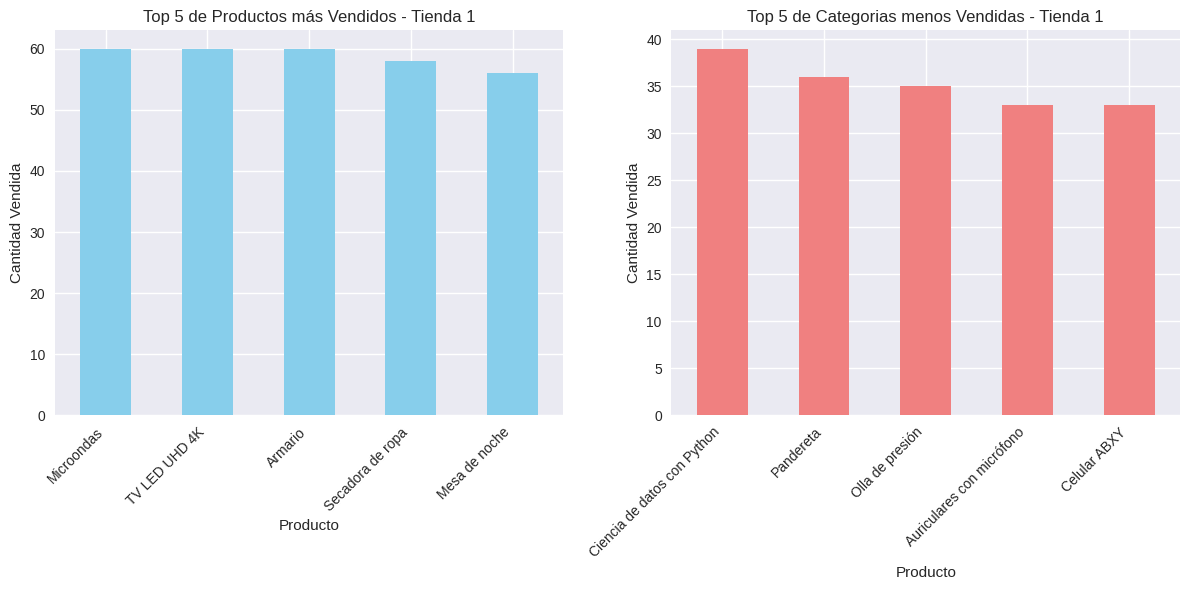

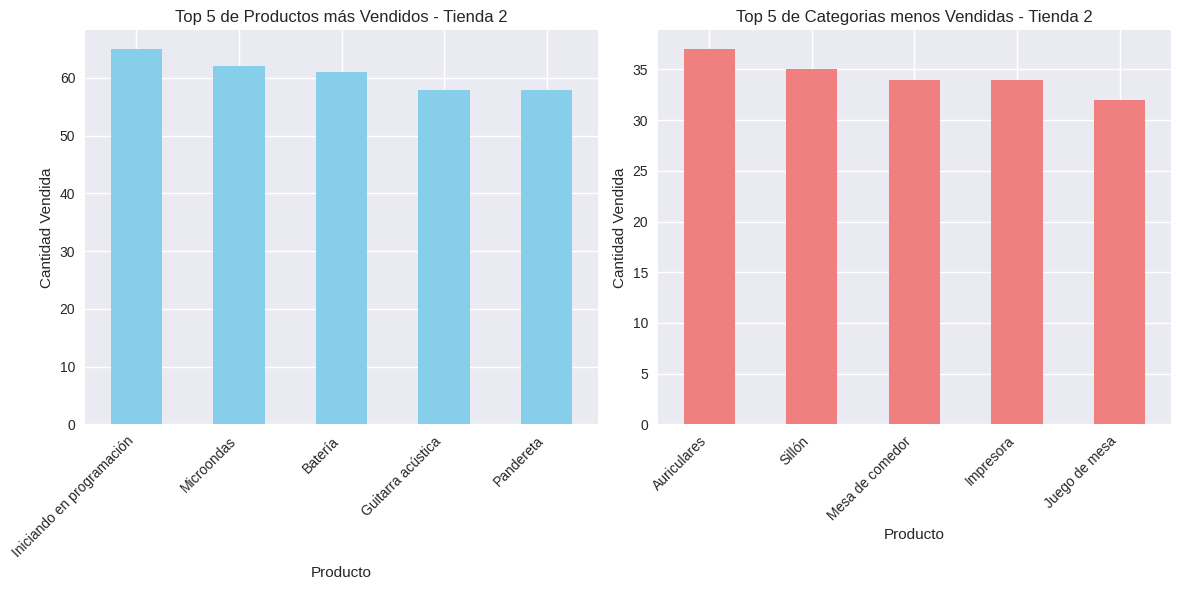

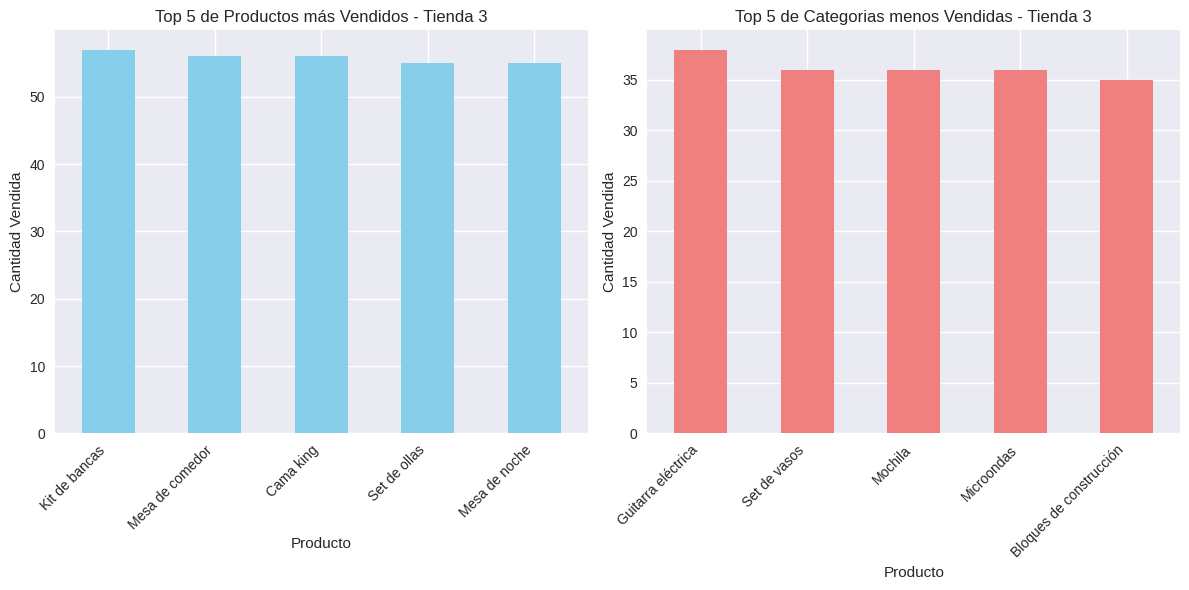

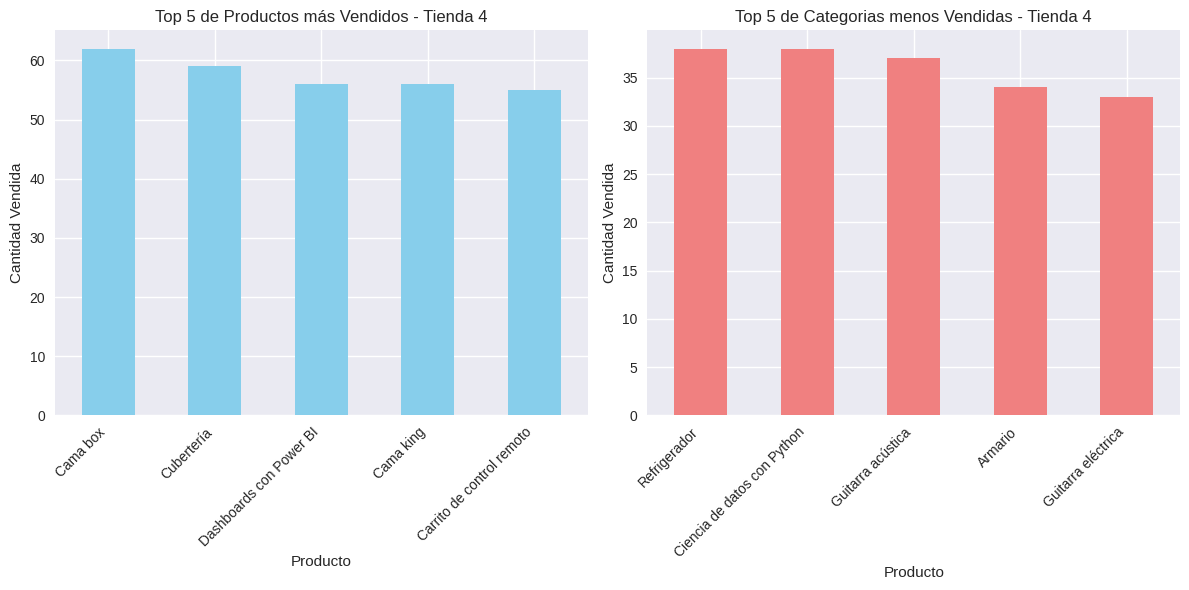

In [ ]:
import matplotlib.pyplot as plt

def analyze_product_sales(store_data, store_name):
    "Análisis y visualización de ventas por producto (tienda)"

    # Conteo de productos por tienda
    product_sales = store_data['Producto'].value_counts()

    # Identificación de los productos más y menos vendidos
    top_sellers = product_sales.head(5)
    bottom_sellers = product_sales.tail(5)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    top_sellers.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 de Productos más Vendidos - {store_name}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    bottom_sellers.plot(kind='bar', color='lightcoral')
    plt.title(f'Top 5 de Categorias menos Vendidas - {store_name}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Analisis de las categorias por tienda
analyze_product_sales(tienda, 'Tienda 1')
analyze_product_sales(tienda2, 'Tienda 2')
analyze_product_sales(tienda3, 'Tienda 3')
analyze_product_sales(tienda4, 'Tienda 4')


# 5. Envío promedio por tienda

/tmp/ipython-input-396867065.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])


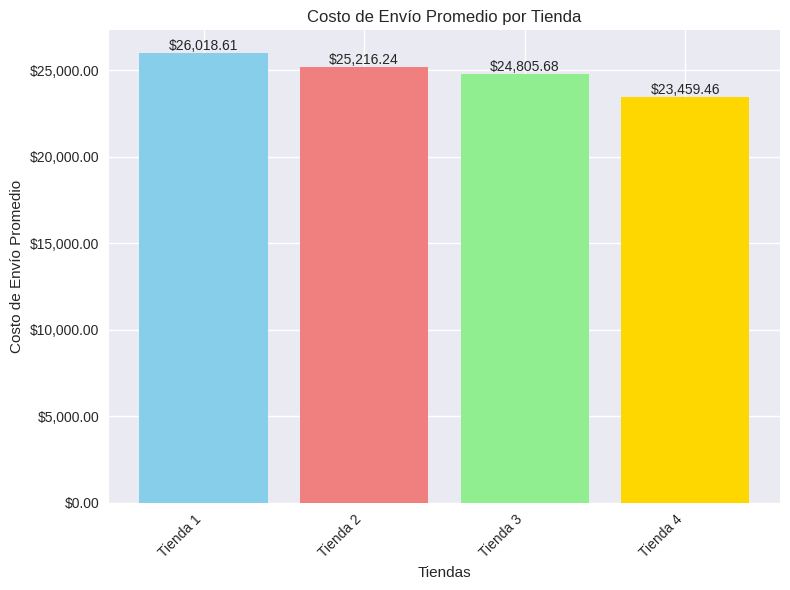

El costo de envío promedio de Tienda 1 es: $26,018.61
El costo de envío promedio de Tienda 2 es: $25,216.24
El costo de envío promedio de Tienda 3 es: $24,805.68
El costo de envío promedio de Tienda 4 es: $23,459.46


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el costo de envío promedio para cada tienda
average_shipping_costs = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(average_shipping_costs.keys(), average_shipping_costs.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')

# Formatear las etiquetas del eje y para mostrar dos decimales
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in current_values])

# Agregar las etiquetas de datos a cada barra
for i, v in enumerate(average_shipping_costs.values()):
    plt.text(i, v + 0.05, '${:,.2f}'.format(v), ha='center', va='bottom')  # Ajusta 0.05 para evitar superposiciones

plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()
plt.show()

# Imprimir los costos de envío promedio para cada tienda (opcional)
for tienda, costo in average_shipping_costs.items():
    print(f"El costo de envío promedio de {tienda} es: ${costo:,.2f}")

# 6. Analisis de desempeño geografico

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_heatmap(tienda, nombre_tienda):
    # Calcular la cantidad de ventas por ciudad
    ventas_por_ciudad = tienda.groupby('Lugar de Compra')['Precio'].count().reset_index()
    ventas_por_ciudad.rename(columns={'Precio': 'Cantidad de Ventas'}, inplace=True)

    # Crear la tabla dinámica para el mapa de calor
    heatmap_data = ventas_por_ciudad.pivot_table(index='Lugar de Compra', values='Cantidad de Ventas')

    # Crear el mapa de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')  # Usar 'YlGnBu' como mapa de colores
    plt.title(f'Mapa de Calor de Ventas por Ciudad - {nombre_tienda}')
    plt.xlabel('Cantidad de Ventas')
    plt.ylabel('Ciudad')
    plt.show()

# Mapa de Calor por tienda y ciudad
create_heatmap(tienda, 'Tienda 1')
create_heatmap(tienda2, 'Tienda 2')
create_heatmap(tienda3, 'Tienda 3')
create_heatmap(tienda4, 'Tienda 4')

AttributeError: 'str' object has no attribute 'groupby'

In [ ]:
import plotly.express as px

def plot_geo_heatmap(df, store_name):
    # Agrupar por ciudad y sumar las ventas
    sales_by_city = df.groupby('Lugar de Compra')['Precio'].sum().reset_index()
    sales_by_city.rename(columns={'Precio': 'Total Sales'}, inplace=True)

    # Fusionar con las coordenadas
    sales_with_coords = pd.merge(sales_by_city, df[['Lugar de Compra', 'lat', 'lon']], on='Lugar de Compra', how='left')
    sales_with_coords.drop_duplicates(subset=['Lugar de Compra'], inplace=True)

    # Crear el mapa de calor
    fig = px.scatter_mapbox(sales_with_coords, lat="lat", lon="lon", color="Total Sales", size="Total Sales",
                            hover_name="Lugar de Compra",
                            hover_data=["Total Sales"],
                            color_continuous_scale=px.colors.sequential.Plasma,
                            zoom=4,
                            mapbox_style="carto-positron",
                            title=f"Mapa de Calor de Ventas por Ciudad - {store_name}")

    fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 0})
    fig.show()


# Llamar a la función para cada tienda: Muestra como se distribuye en Colombia, cada tienda
plot_geo_heatmap(tienda, 'Tienda 1')
plot_geo_heatmap(tienda2, 'Tienda 2')
plot_geo_heatmap(tienda3, 'Tienda 3')
plot_geo_heatmap(tienda4, 'Tienda 4')

#7. Informe final

Informe Final: Recomendación de Venta de Tienda

El objetivo de este análisis es comparar el desempeño de cuatro tiendas con el fin de recomendar al Sr. Juan cuál debería vender para financiar la inversión en un nuevo negocio. La evaluación se centra en los siguientes criterios:

-Ingresos totales

-Categorías de productos más y menos vendidos

-Calificación promedio de los clientes

-Productos más y menos vendidos

-Costo de envío promedio

1. Ingresos Totales

La Tienda 1 registra los mayores ingresos, seguida por la Tienda 2, luego la Tienda 3 y finalmente la Tienda 4, que presenta el nivel más bajo de facturación. Sin embargo, la diferencia entre ellas no supera los 120 millones de pesos, lo cual no marca una brecha significativa. En términos de aportes al negocio, todas las tiendas mantienen una contribución relativamente equilibrada y los gastos por costos de envío también son bastante similares.

2. Categorías de Productos

Las ventas por categorías muestran un comportamiento semejante en todas las tiendas, diferenciándose más por el volumen que por el tipo de producto. Las categorías predominantes son Muebles, Electrónicos y Juguetes. Por el contrario, en las categorías menos vendidas sí se aprecian diferencias, aunque con cierta similitud entre las Tiendas 1 y 2. Aun así, esta métrica por sí sola no es suficiente para decidir qué tienda vender, ya que sería necesario analizar información financiera más detallada.

3. Calificación Promedio de los Clientes

La Tienda 1 presenta la calificación promedio más baja, mientras que la Tienda 3 obtiene la más alta. Sin embargo, la diferencia entre ellas es mínima y podría considerarse poco significativa. De hecho, si se redondearan los valores a un número entero, todas las tiendas reflejarían un nivel de satisfacción de clientes prácticamente equivalente.

4. Productos Más y Menos Vendidos

Aunque las categorías de productos comparten tendencias similares en el top 3, la situación cambia cuando se analizan los productos específicos. Cada tienda presenta un patrón de ventas propio, lo que refleja preferencias diferenciadas de los clientes. Identificar estos artículos resulta clave para optimizar inventarios y mejorar la estrategia comercial.

5. Costo de Envío Promedio

La Tienda 4 tiene el costo de envío promedio más bajo, probablemente vinculado a su menor nivel de facturación. En contraste, la Tienda 1 es la que registra los costos de envío más altos, aunque esto no parece impactar negativamente en sus ventas. En general, las variaciones entre tiendas no muestran un efecto contundente en el desempeño global.

Conclusión

Con la información disponible, la tienda que se perfila como candidata a la venta es la Tienda 4, ya que su desempeño es el más débil en comparación con las demás. No obstante, antes de tomar una decisión definitiva sería necesario contar con datos más amplios sobre costos fijos y variables (personal, compras, alquiler, servicios, impuestos, etc.), así como un análisis de la utilidad neta de cada tienda.

En caso de vender la Tienda 4, sería recomendable transferir sus clientes hacia las otras tres tiendas para aprovechar esa base de consumidores. Además, la inversión obtenida debería destinarse a un negocio capaz de generar una facturación superior a $1.000 millones de pesos, asegurando así un mayor potencial de crecimiento y rentabilidad.

Justificación

La Tienda 4 combina ingresos totales más bajos, un costo de envío bajo que no representa una ventaja competitiva y una calificación de clientes que, aunque no es la peor, tampoco ofrece un diferencial positivo. Además, comparte el mismo top 3 de ciudades principales (Bogotá, Medellín y Cali) con las demás tiendas, lo que limita su ventaja en el mercado.

Por estas razones, vender la Tienda 4 aparece como la opción más estratégica. Los recursos obtenidos podrían reinvertirse en fortalecer las tres tiendas restantes —capitalizando los clientes de la Tienda 4— o destinarse a un nuevo negocio con mayor proyección de crecimiento.